## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf

## Import dataset

In [2]:
dataset = pd.read_csv('train_TCS.csv')


In [3]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-08,358.000000,359.250000,348.250000,349.899994,281.587463,6048178.0
1,2010-01-11,352.000000,360.049988,350.200012,357.100006,287.381775,4318408.0
2,2010-01-12,366.000000,377.000000,363.500000,375.024994,301.807220,9027690.0
3,2010-01-13,372.500000,398.200012,372.325012,394.274994,317.298950,10910272.0
4,2010-01-14,399.225006,399.225006,384.674988,389.924988,313.798279,10327614.0
...,...,...,...,...,...,...,...
2716,2021-01-01,2880.000000,2940.000000,2879.000000,2928.250000,2922.688232,2681440.0
2717,2021-01-04,2950.000000,3050.750000,2940.949951,3039.449951,3033.677002,5113293.0
2718,2021-01-05,3039.600098,3114.250000,3039.600098,3093.000000,3087.125244,5801309.0
2719,2021-01-06,3100.000000,3113.500000,3037.199951,3051.500000,3045.704102,3726716.0


In [4]:
dataset.isnull().sum() # to check whether the data contain null values or not 

Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64

In [5]:
dataset.dropna(inplace = True ) # dropping NAN value rows

In [6]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
np.set_printoptions(precision= 2) # fixing the decimal place upto 2 decimal place
training_set = dataset.iloc[:,1:2].values 

In [8]:
training_set

array([[ 358. ],
       [ 352. ],
       [ 366. ],
       ...,
       [3039.6],
       [3100. ],
       [3075. ]])

## Feature_Scaling 

In [9]:
from sklearn.preprocessing import MinMaxScaler # fecature scaling  ,MinMaxScaler outcomes in between 0 and 1
sc =MinMaxScaler()

In [10]:
training_set_scaled = sc.fit_transform(training_set) # appling fit_transform method for getting out value scaled

In [11]:
training_set_scaled

array([[0.  ],
       [0.  ],
       [0.01],
       ...,
       [0.98],
       [1.  ],
       [0.99]])

In [12]:
# here we tak the perioed of 60 dayes  ,means prediction of today on the basis of stock prices of last 60 days
X_train = []
Y_train = []
for i in range(60,2712):
    X_train.append(training_set_scaled[i-60:i,0])
    Y_train.append(training_set_scaled[i,0])
    
    
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [13]:
X_train

array([[0.  , 0.  , 0.01, ..., 0.02, 0.02, 0.02],
       [0.  , 0.01, 0.01, ..., 0.02, 0.02, 0.02],
       [0.01, 0.01, 0.02, ..., 0.02, 0.02, 0.02],
       ...,
       [0.89, 0.89, 0.9 , ..., 0.93, 0.92, 0.95],
       [0.89, 0.9 , 0.91, ..., 0.92, 0.95, 0.98],
       [0.9 , 0.91, 0.91, ..., 0.95, 0.98, 1.  ]])

In [14]:
Y_train

array([0.02, 0.02, 0.02, ..., 0.98, 1.  , 0.99])

In [15]:
##  Reshaping 

In [112]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] , 1))

In [17]:
X_train.shape

(2652, 60, 1)

In [18]:
X_train.shape[1] , 1

(60, 1)

## Building RNN


In [20]:
from keras.models import Sequential
from keras.layers import Dense ,LSTM ,Dropout

## Initializing the RNN 


In [22]:
regressor = Sequential() # we creted the object of class Sequential() as regressor , because we have to predict continious values

In [23]:
# First layes
regressor.add(LSTM(units = 50,return_sequences = True  , input_shape = (X_train.shape[1], 1) ))
regressor.add(Dropout(0.2))

In [24]:

# Second layer
regressor.add(LSTM(units = 50,return_sequences = True  ))
regressor.add(Dropout(0.2))

In [25]:
# Third layer
regressor.add(LSTM(units = 50,return_sequences = True  ))
regressor.add(Dropout(0.2))

In [26]:
regressor.add(LSTM(units = 50 ))
regressor.add(Dropout(0.2))

In [27]:
## Adding output layer 
regressor.add(Dense(units =1 ))


In [28]:
regressor.compile(optimizer = 'adam' , loss = 'MSE')

In [32]:
regressor.fit(X_train , Y_train ,batch_size =32, epochs = 100 )

Epoch 1/100
83/83 [==============================] - 8s 97ms/step - loss: 5.0327e-04
Epoch 2/100
83/83 [==============================] - 8s 98ms/step - loss: 5.3385e-04
Epoch 3/100
83/83 [==============================] - 8s 97ms/step - loss: 4.7952e-04
Epoch 4/100
83/83 [==============================] - 8s 98ms/step - loss: 5.3637e-04
Epoch 5/100
83/83 [==============================] - 8s 98ms/step - loss: 5.5136e-04
Epoch 6/100
83/83 [==============================] - 8s 98ms/step - loss: 4.9089e-04
Epoch 7/100
83/83 [==============================] - 8s 98ms/step - loss: 5.3555e-04
Epoch 8/100
83/83 [==============================] - 8s 98ms/step - loss: 7.3499e-04
Epoch 9/100
83/83 [==============================] - 8s 98ms/step - loss: 7.5269e-04
Epoch 10/100
83/83 [==============================] - 8s 97ms/step - loss: 5.6173e-04
Epoch 11/100
83/83 [==============================] - 8s 98ms/step - loss: 5.5251e-04
Epoch 12/100
83/83 [==============================] - 8s 98ms/s

83/83 [==============================] - 8s 100ms/step - loss: 4.9817e-04
Epoch 96/100
83/83 [==============================] - 8s 101ms/step - loss: 4.4881e-04
Epoch 97/100
83/83 [==============================] - 8s 101ms/step - loss: 4.9034e-04
Epoch 98/100
83/83 [==============================] - 9s 103ms/step - loss: 4.7338e-04
Epoch 99/100
83/83 [==============================] - 9s 103ms/step - loss: 4.3789e-04
Epoch 100/100
83/83 [==============================] - 9s 104ms/step - loss: 4.4987e-04


## Predicting Test_set result

In [35]:

dataset_test = pd.read_csv('Test_TCS.csv')

In [36]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [37]:
test_set = dataset_test.iloc[:,1:2].values

In [39]:
np.set_printoptions(precision = 2)
test_set

array([[3090.  ],
       [3230.  ],
       [3176.45],
       [3175.  ],
       [3155.  ],
       [3235.  ],
       [3250.  ],
       [3233.  ],
       [3270.  ],
       [3305.  ],
       [3241.9 ],
       [3308.95],
       [3300.  ],
       [3230.  ],
       [3210.05],
       [3100.  ],
       [3174.  ],
       [3213.  ],
       [3216.05],
       [3198.95]])

In [40]:
test_set_scaled = sc.transform(test_set)

In [41]:
test_set_scaled

array([[1.  ],
       [1.05],
       [1.03],
       [1.03],
       [1.02],
       [1.05],
       [1.05],
       [1.05],
       [1.06],
       [1.07],
       [1.05],
       [1.08],
       [1.07],
       [1.05],
       [1.04],
       [1.  ],
       [1.03],
       [1.04],
       [1.04],
       [1.04]])

In [65]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), 0)

In [66]:
dataset_total.tail(50)

2691    2729.000000
2692    2686.000000
2693    2705.000000
2694    2679.000000
2695    2719.000000
2696    2773.899902
2697    2710.800049
2698    2715.000000
2699    2740.000000
2700    2815.000000
2701    2818.000000
2702    2792.699951
2703    2802.000000
2704    2786.000000
2705    2779.000000
2706    2811.000000
2707    2868.000000
2708    2861.000000
2709    2834.000000
2710    2876.050049
2711    2909.000000
2712    2910.000000
2713    2920.000000
2714    2934.399902
2715    2900.000000
2716    2880.000000
2717    2950.000000
2718    3039.600098
2719    3100.000000
2720    3075.000000
0       3090.000000
1       3230.000000
2       3176.449951
3       3175.000000
4       3155.000000
5       3235.000000
6       3250.000000
7       3233.000000
8       3270.000000
9       3305.000000
10      3241.899902
11      3308.949951
12      3300.000000
13      3230.000000
14      3210.050049
15      3100.000000
16      3174.000000
17      3213.000000
18      3216.050049
19      3198.949951


In [110]:
inputs = dataset_total[len(dataset_total)- len(dataset_test)- 60 :].values



In [99]:
inputs 

array([2845.  , 2842.  , 2811.  , 2750.1 , 2774.  , 2725.  , 2739.  ,
       2661.  , 2687.8 , 2689.95, 2699.75, 2650.  , 2608.  , 2636.1 ,
       2660.  , 2604.  , 2610.  , 2685.  , 2699.  , 2731.1 , 2697.2 ,
       2667.95, 2686.  , 2655.75, 2695.  , 2661.  , 2637.  , 2655.  ,
       2690.  , 2734.4 , 2729.  , 2686.  , 2705.  , 2679.  , 2719.  ,
       2773.9 , 2710.8 , 2715.  , 2740.  , 2815.  , 2818.  , 2792.7 ,
       2802.  , 2786.  , 2779.  , 2811.  , 2868.  , 2861.  , 2834.  ,
       2876.05, 2909.  , 2910.  , 2920.  , 2934.4 , 2900.  , 2880.  ,
       2950.  , 3039.6 , 3100.  , 3075.  , 3090.  , 3230.  , 3176.45,
       3175.  , 3155.  , 3235.  , 3250.  , 3233.  , 3270.  , 3305.  ,
       3241.9 , 3308.95, 3300.  , 3230.  , 3210.05, 3100.  , 3174.  ,
       3213.  , 3216.05, 3198.95])

In [100]:

inputs = inputs.reshape(-1,1)

In [101]:
inputs

array([[2845.  ],
       [2842.  ],
       [2811.  ],
       [2750.1 ],
       [2774.  ],
       [2725.  ],
       [2739.  ],
       [2661.  ],
       [2687.8 ],
       [2689.95],
       [2699.75],
       [2650.  ],
       [2608.  ],
       [2636.1 ],
       [2660.  ],
       [2604.  ],
       [2610.  ],
       [2685.  ],
       [2699.  ],
       [2731.1 ],
       [2697.2 ],
       [2667.95],
       [2686.  ],
       [2655.75],
       [2695.  ],
       [2661.  ],
       [2637.  ],
       [2655.  ],
       [2690.  ],
       [2734.4 ],
       [2729.  ],
       [2686.  ],
       [2705.  ],
       [2679.  ],
       [2719.  ],
       [2773.9 ],
       [2710.8 ],
       [2715.  ],
       [2740.  ],
       [2815.  ],
       [2818.  ],
       [2792.7 ],
       [2802.  ],
       [2786.  ],
       [2779.  ],
       [2811.  ],
       [2868.  ],
       [2861.  ],
       [2834.  ],
       [2876.05],
       [2909.  ],
       [2910.  ],
       [2920.  ],
       [2934.4 ],
       [2900.  ],
       [28

In [102]:
inputs = sc.transform(inputs)

In [103]:
inputs.shape

(80, 1)

In [104]:
X_test =[]
for i in range(60,81):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [113]:
X_test

array([[0.91, 0.91, 0.89, ..., 0.98, 1.  , 0.99],
       [0.91, 0.89, 0.87, ..., 1.  , 0.99, 1.  ],
       [0.89, 0.87, 0.88, ..., 0.99, 1.  , 1.05],
       ...,
       [0.85, 0.87, 0.85, ..., 1.  , 1.03, 1.04],
       [0.87, 0.85, 0.84, ..., 1.03, 1.04, 1.04],
       [0.85, 0.84, 0.85, ..., 1.04, 1.04, 1.04]])

In [105]:
X_test.shape[0]

21

In [106]:
X_test.shape[1]

60

In [114]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] , 1))

In [115]:
Y_pred = regressor.predict(X_test)

In [116]:
Y_pred

array([[0.95],
       [0.95],
       [0.98],
       [0.98],
       [0.98],
       [0.98],
       [0.99],
       [1.  ],
       [1.  ],
       [1.01],
       [1.02],
       [1.01],
       [1.02],
       [1.02],
       [1.01],
       [1.01],
       [0.99],
       [0.99],
       [1.  ],
       [1.  ],
       [1.  ]], dtype=float32)

In [117]:
Y_pred = sc.inverse_transform(Y_pred)

In [118]:
Y_pred


array([[2953.84],
       [2973.38],
       [3048.5 ],
       [3045.84],
       [3046.04],
       [3049.5 ],
       [3084.26],
       [3100.07],
       [3096.83],
       [3117.98],
       [3143.09],
       [3125.78],
       [3149.31],
       [3160.96],
       [3132.17],
       [3119.63],
       [3070.04],
       [3081.07],
       [3099.36],
       [3098.94],
       [3095.15]], dtype=float32)

## visualization

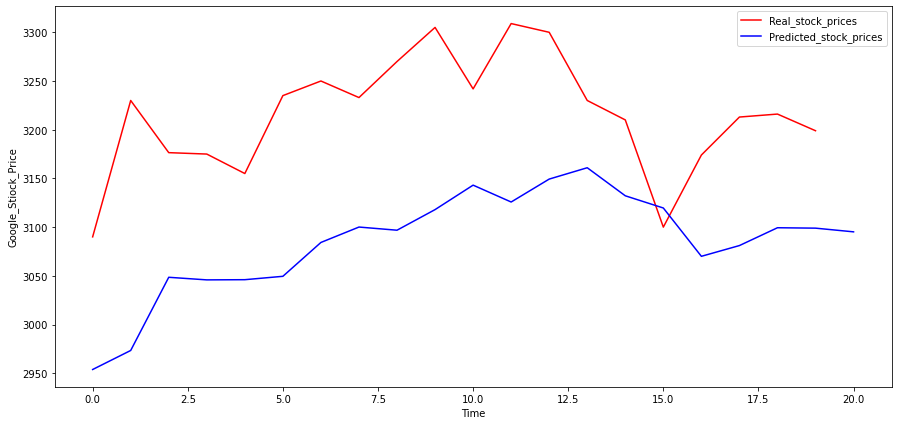

In [124]:
plt.figure(figsize = (15,7))

plt.plot(test_set , color = 'red' , label = 'Real_stock_prices')
plt.plot(Y_pred ,color = 'blue' , label = 'Predicted_stock_prices')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Google_Stiock_Price')
plt.show()